# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

---

1. Los datos que me ayudarían a trabajar en el problema serían los precios de las propiedades, su área, cantidad de habitaciones y baños, ubicación y años de construcción.
**Precios**: para poder crear el modelo para predecir los precios, este sería nuestro Target.

**Área, habitaciones y baños**: para saber si estos influyen en el precio, y de ser así con cuantos de cada uno el precio aumenta o disminuye. Sobretodo el área, si se cumple el "en que más grande más costoso" o no, sobretodo son atributos que influyen en el precio. 

**Ubicación**: para encontrar los sitios más costosos, donde las propiedades son más costosas o menos costosas, para así revisar su influencia en el precio. 

**Años de construcción**: si el tiempo, la "edad" de construcción, influye en el precio, siendo más costoso entre más nuevo o si disminuye su precio por viejo.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
data = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
data = pd.DataFrame(data)
print(data.shape)
data.head()

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Quisiera revisar que tipo de operaciones tenemos en el dataset, ya que aparece solo en "venta" las primeras 5 instancias, y de esto revisar cuanto de cada una tenemos. 

In [3]:
data["operation_type"].value_counts()

Venta    146660
Name: operation_type, dtype: int64

Podemos ver que solo tenemos propiedades puestas en venta en el dataset, lo cual nos ayuda bastante con la predicción del precio, ya que de haber otro tipo de operación, debia haberse limpiado el dataset para así solo tener operaciones en venta para predecir el precio de una propiedad. 

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
data.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [5]:
print(data.property_type.value_counts())

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


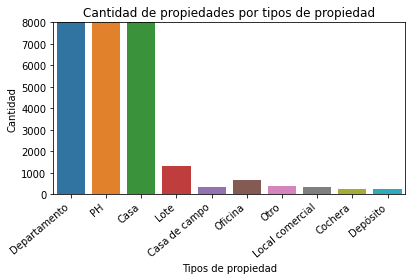

In [6]:
plot = sns.countplot(data = data, x = "property_type") 
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de propiedades por tipos de propiedad")
plt.xlabel("Tipos de propiedad")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.ylim(0,8000)
plt.show()

"Departamento", "PH", "Casa", son el top tres de tipos de propiedad en Buenos Aires, el gráfico se configuró hasta una cuenta de máximo 8000 para poder visualizar los otros tipos de propiedades en el gráfico. 

In [7]:
tipo_propiedad = pd.DataFrame(data.groupby(["property_type"], sort = True)["property_type"].count().reset_index(name="Total"))
tipo_propiedad.sort_values(by=["Total"], ascending = False, inplace=True, ignore_index=True)
tipo_propiedad

,property_type,Total
0,Departamento,107326
1,Casa,21521
2,PH,14298
3,Lote,1312
4,Oficina,658
5,Otro,374
6,Local comercial,325
7,Casa de campo,322
8,Depósito,265
9,Cochera,259


4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [8]:
print(data.l2.value_counts())
print(data.l3.value_counts())
print(pd.unique(data['l3']))

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64
Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64
['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando

In [9]:
l2 = pd.DataFrame(data.groupby(["l2"], sort = True)["l2"].count().reset_index(name="Total"))
l2.sort_values(by=["Total"], ascending = False, inplace=True, ignore_index=True)
l2

,l2,Total
0,Capital Federal,92539
1,Bs.As. G.B.A. Zona Norte,24282
2,Bs.As. G.B.A. Zona Sur,17173
3,Bs.As. G.B.A. Zona Oeste,12666


In [10]:
l3 = pd.DataFrame(data.groupby(["l3"], sort = True)["l3"].count().reset_index(name="Total"))
l3.sort_values(by=["Total"], ascending = False, inplace=True, ignore_index=True)
l3

,l3,Total
0,Palermo,13073
1,Tigre,8718
2,Almagro,7527
3,Belgrano,6935
4,Caballito,6650
...,...,...
84,Cañuelas,108
85,Villa Soldati,69
86,Villa Riachuelo,42
87,Marcos Paz,35


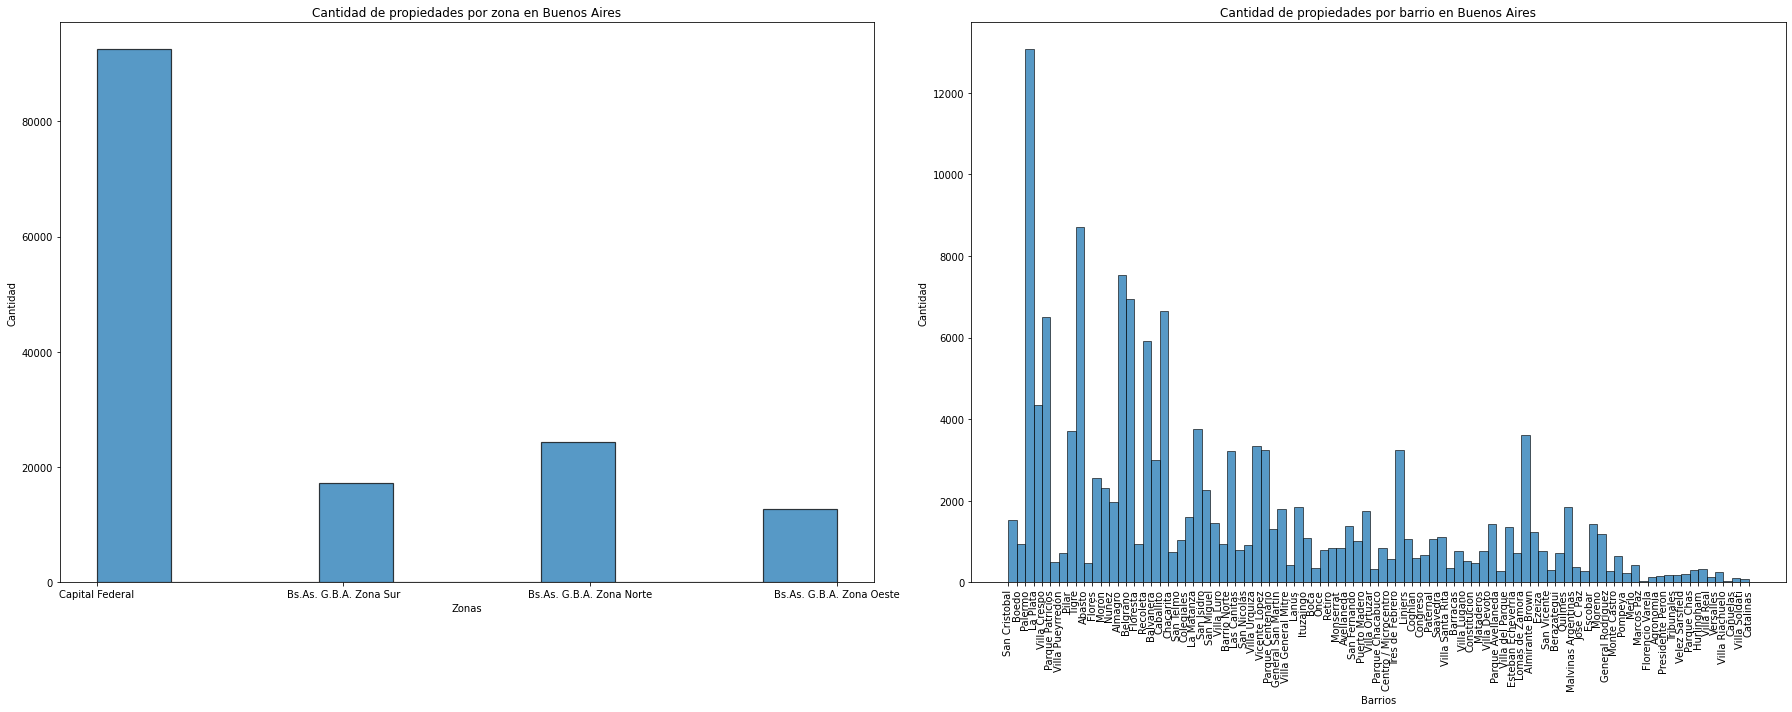

In [11]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
plt.hist("l2", data=data, alpha = 0.75, edgecolor='black', linewidth=1.2)
plt.title("Cantidad de propiedades por zona en Buenos Aires")
plt.xlabel("Zonas")
plt.ylabel("Cantidad")

plt.subplot(1,2,2)
plt.hist("l3", data=data,bins = np.linspace(0,88,89), alpha = 0.75, edgecolor='black', linewidth=0.8)
plt.title("Cantidad de propiedades por barrio en Buenos Aires")
plt.xlabel("Barrios")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Ahora organizaré los gráficos para que se vean mejor las etiquetas y su distribución de mayor a menor. 

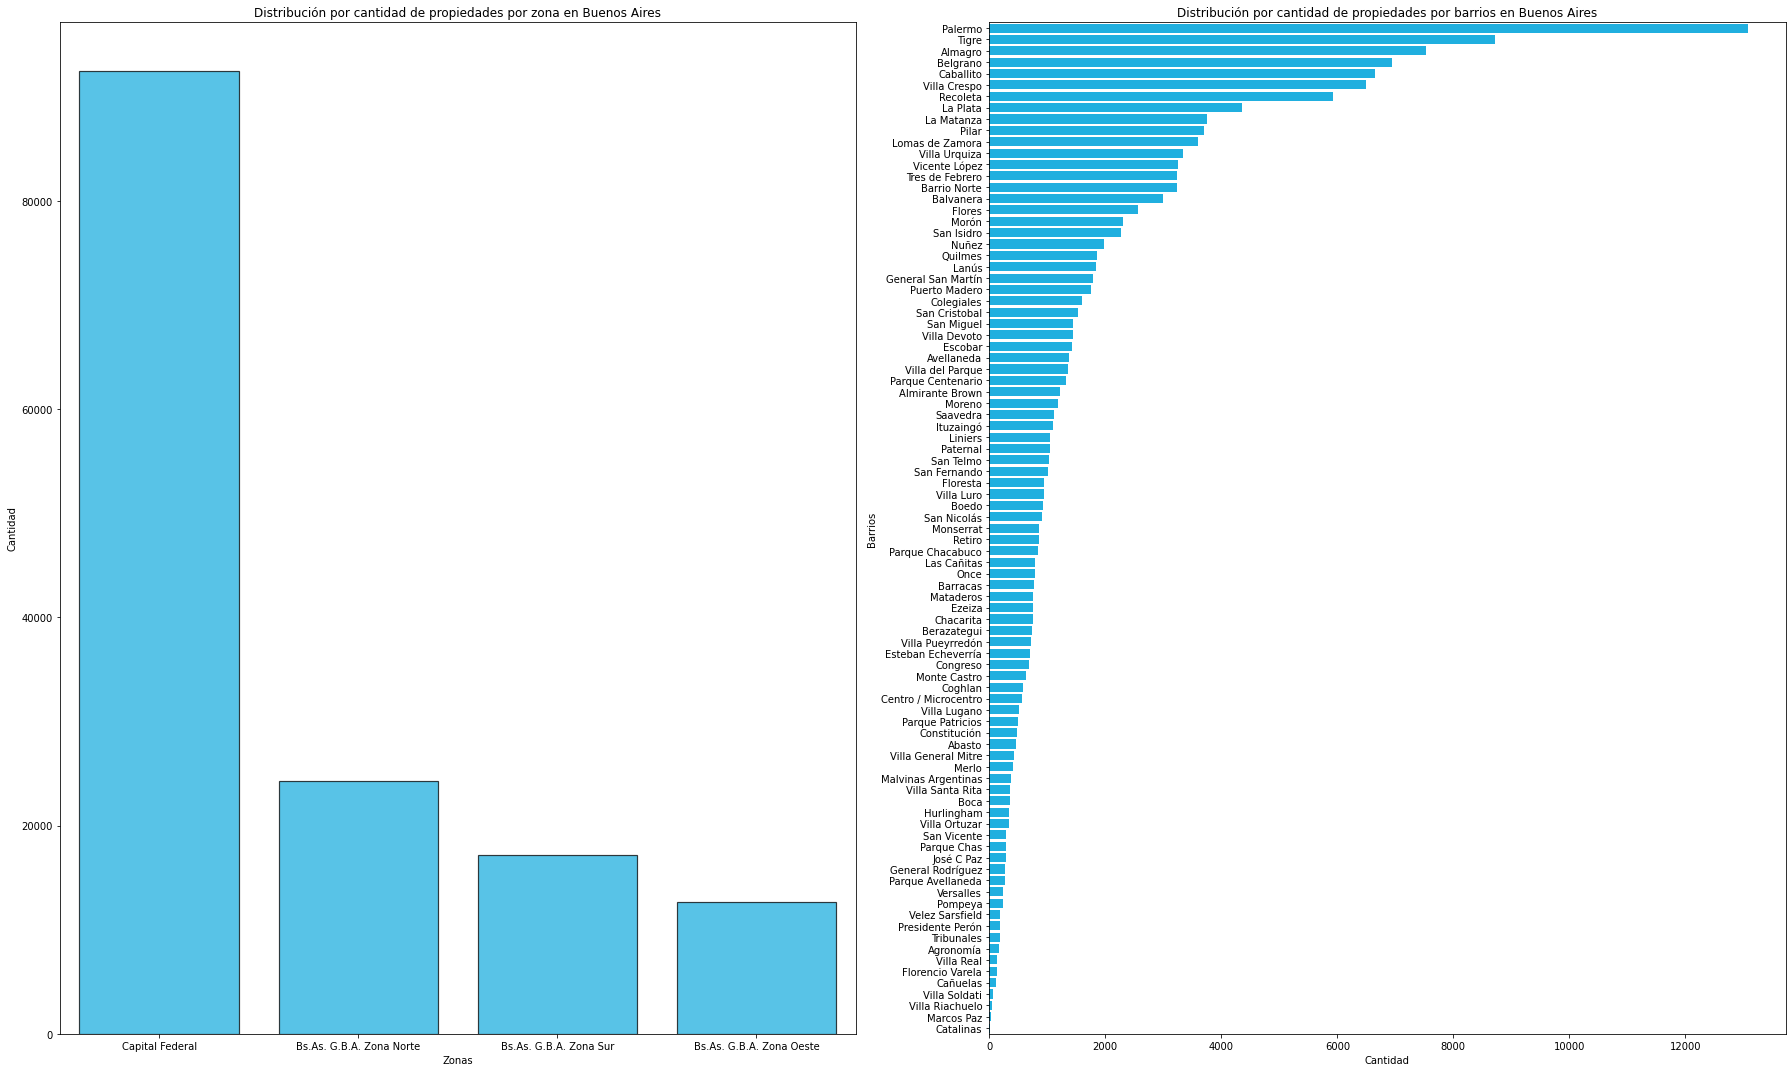

In [12]:
plt.figure(figsize = (25,15))
plt.subplot(1,2,1)
sns.countplot("l2", data=data, alpha = 0.75, edgecolor='black', linewidth=1.2, order= data["l2"].value_counts().index, color='deepskyblue')
plt.title("Distribución por cantidad de propiedades por zona en Buenos Aires")
plt.xlabel("Zonas")
plt.ylabel("Cantidad")

plt.subplot(1,2,2)
sns.countplot(data = data, y = "l3", order= data["l3"].value_counts().index, color='deepskyblue') 
plt.title("Distribución por cantidad de propiedades por barrios en Buenos Aires")
plt.xlabel("Cantidad")
plt.ylabel("Barrios")
plt.tight_layout()
plt.show()

Analizando este par de gráficos, podemos ver que "Capital Federal" es la zona con la mayor cantidad de propiedades en Buenos Aires, así como también lo es Palermo, El Tigre y Almagro, como los barrios con la mayor cantidad de propiedades en Buenos Aires. Así como también, podemos al final del gráfico derecho, que los barrios como "Catalinas, Marcos Perez y Villa Soldati", tienen una menor cantidad de propiedades publicadas en venta 

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [13]:
data_df = data[(data.l2 == 'Capital Federal') & (data.property_type.isin(['Departamento','Casa','PH']))]
print(data_df.shape)
data_df.head()

(91485, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [14]:
data_df.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

Igualmente con este filtrado tenemos valores nulos en el dataset, sobretodo en variables características de las propiedades como los baños y su superficie.

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

**6.1** Datos estadísticos

In [15]:
est_df = data_df[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
est_df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Las variables que toman valores que no tienen mucho sentido son aquellos que tienen su máximo muy alejado de su 75%, lo cual no nos ayuda a dar una correcta predicción en los precios como es solicitado, sobretodo serán variables que van a afectar mucho la predicción del precio de una propiedad, siendo estas características alejadas a la mayoría de los datos, como outliers.

**6.2 y 6.3** Valores muy grandes y muy pequeños de surface total

Text(0.5, 1.0, 'Distribución de superficie total')

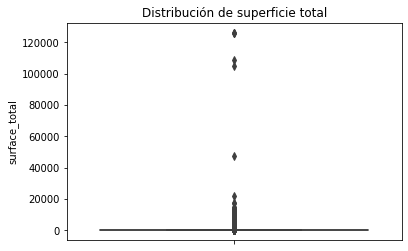

In [16]:
sns.boxplot(data=est_df, y="surface_total")
plt.title("Distribución de superficie total")

In [17]:
est_df["surface_total"].quantile(0.95)

250.0

In [18]:
est_df["surface_total"].quantile(0.25)

49.0

El 95% del dataframe se encuentra hasta una superficie total de 250, lo cual nos dice que más alla de 250 son valores muy grandes que dificultan la visualización de la data, también vemos que el 25% van hasta el 49, así que podemos definir 50 como lo más bajo.

In [19]:
est_df = est_df[(est_df['surface_total'] <= 250) 
              & (est_df['surface_total'] >= 50)] 
print(est_df.shape)
est_df.head()

(57776, 6)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
6,2.0,1.0,1.0,70.0,70.0,159500.0


In [20]:
est_df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,57776.000000,57776.000000,57228.000000,57776.000000,57444.000000,5.777600e+04
mean,3.277209,2.222843,1.646746,97.833858,88.367140,2.712433e+05
std,1.026319,0.902997,0.805023,45.064143,152.201041,2.099456e+05
min,1.000000,0.000000,1.000000,50.000000,1.000000,6.000000e+03
25%,3.000000,2.000000,1.000000,64.000000,57.000000,1.570000e+05
50%,3.000000,2.000000,1.000000,83.000000,73.000000,2.150000e+05
75%,4.000000,3.000000,2.000000,120.000000,101.000000,3.000000e+05
max,21.000000,12.000000,14.000000,250.000000,13402.000000,3.500000e+06


Text(0.5, 1.0, 'Distribución de superficie total')

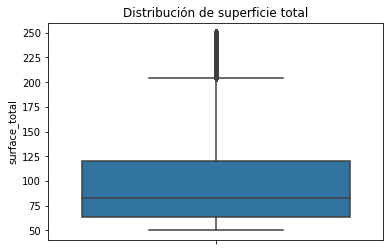

In [21]:
sns.boxplot(data=est_df, y="surface_total")
plt.title("Distribución de superficie total")

Despues de filtrar los valores de surfaces_total, vemos una mejor distribución de los datos, quitando mucho ruido del dataset

**6.4.** Filtrado entre Surface_covered y Surface_total

In [22]:
est_df.isnull().sum()

rooms                0
bedrooms             0
bathrooms          548
surface_total        0
surface_covered    332
price                0
dtype: int64

In [23]:
est_df = est_df[est_df['surface_covered'] <= est_df['surface_total']] 
print(est_df.shape)
est_df.head()

(57026, 6)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
6,2.0,1.0,1.0,70.0,70.0,159500.0


**6.5** Rango de precios

Text(0.5, 1.0, 'Distribución del precio')

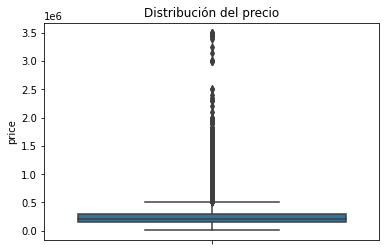

In [24]:
sns.boxplot(data=est_df, y="price")
plt.title("Distribución del precio")

In [25]:
est_df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,57026.000000,57026.000000,56510.000000,57026.000000,57026.000000,5.702600e+04
mean,3.272034,2.218918,1.646452,97.774015,85.367148,2.715025e+05
std,1.021238,0.901001,0.803903,44.964136,39.687740,2.102730e+05
min,1.000000,0.000000,1.000000,50.000000,1.000000,6.000000e+03
25%,3.000000,2.000000,1.000000,64.000000,57.000000,1.580000e+05
50%,3.000000,2.000000,1.000000,83.000000,73.000000,2.150000e+05
75%,4.000000,3.000000,2.000000,120.000000,101.000000,3.010000e+05
max,21.000000,12.000000,14.000000,250.000000,250.000000,3.500000e+06


In [26]:
est_df["price"].quantile(0.95)

640005.25

In [27]:
est_df["price"].quantile(0.25)

158000.0

El 95% del dataframe se encuentra hasta un rango de precio de "640005.25", lo cual nos dice que más alla de este valor, son valores muy grandes que dificultan la visualización de la data, también vemos que el 25% al igual que surface_total anterior va hasta un rango de "158000", lo cual nos muestra que más abajo de eso son precios bastante bajos que pueden interferir con nuestra predicción. Así que podemos definir "158000" como lo más bajo.

In [28]:
est_df = est_df[(est_df['price'] <= 640005.25) & (est_df['price'] >= 158000)] 
print(est_df.shape)
est_df.head()

(39918, 6)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,2.0,1.0,2.0,70.0,58.0,159000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
6,2.0,1.0,1.0,70.0,70.0,159500.0
7,2.0,1.0,1.0,70.0,70.0,159500.0
10,2.0,1.0,2.0,66.0,49.0,170000.0


In [29]:
est_df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,39918.000000,39918.000000,39596.000000,39918.000000,39918.000000,39918.000000
mean,3.420988,2.354351,1.734923,103.005136,89.377549,273492.577108
std,0.999540,0.893181,0.759163,41.495404,35.098220,105332.780073
min,1.000000,0.000000,1.000000,50.000000,1.000000,158000.000000
25%,3.000000,2.000000,1.000000,72.000000,64.000000,192000.000000
50%,3.000000,2.000000,2.000000,91.000000,80.000000,240000.000000
75%,4.000000,3.000000,2.000000,125.000000,107.000000,325000.000000
max,12.000000,12.000000,14.000000,250.000000,250.000000,640000.000000


Text(0.5, 1.0, 'Distribución del precio')

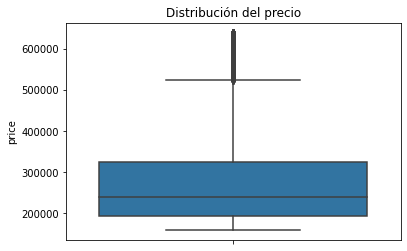

In [30]:
sns.boxplot(data=est_df, y="price")
plt.title("Distribución del precio")

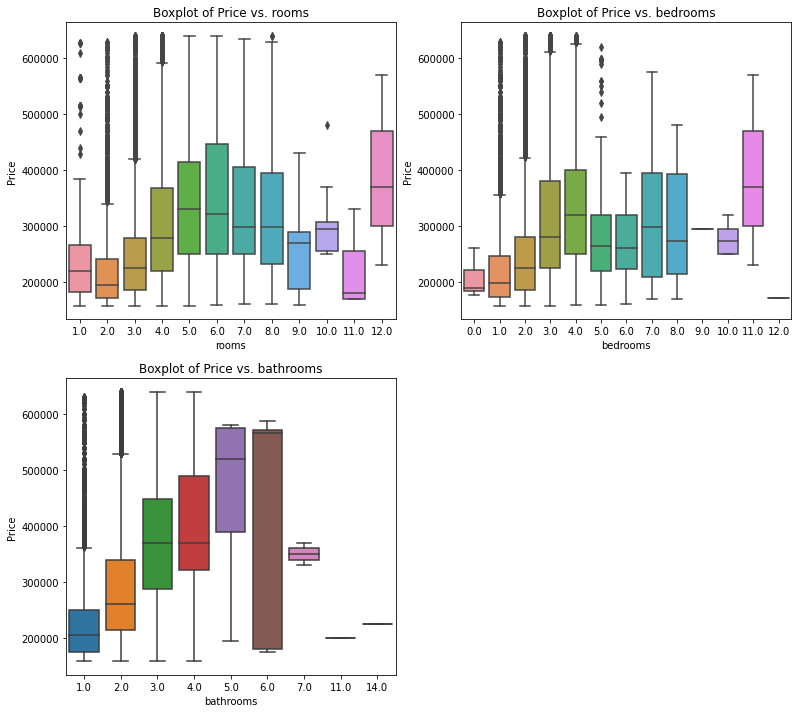

In [31]:
plt.figure(figsize=(13,12))
vars_to_plot = ['rooms', 'bedrooms', 'bathrooms']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='price', data = est_df)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.title(title_string)

Con este gráfico podemos ver la distribución de precios mediante un boxplot de los "bedrooms", "bathrooms" y "rooms". Puediendo analizar que ya hay una mejor distribución de las propiedades según sus características y el precio. Pero igualmente podemos ver que hay propiedades que su precio es irregular, son distribuidos por casi todos los rangos de precios. 

**6.6.** Función pairplot

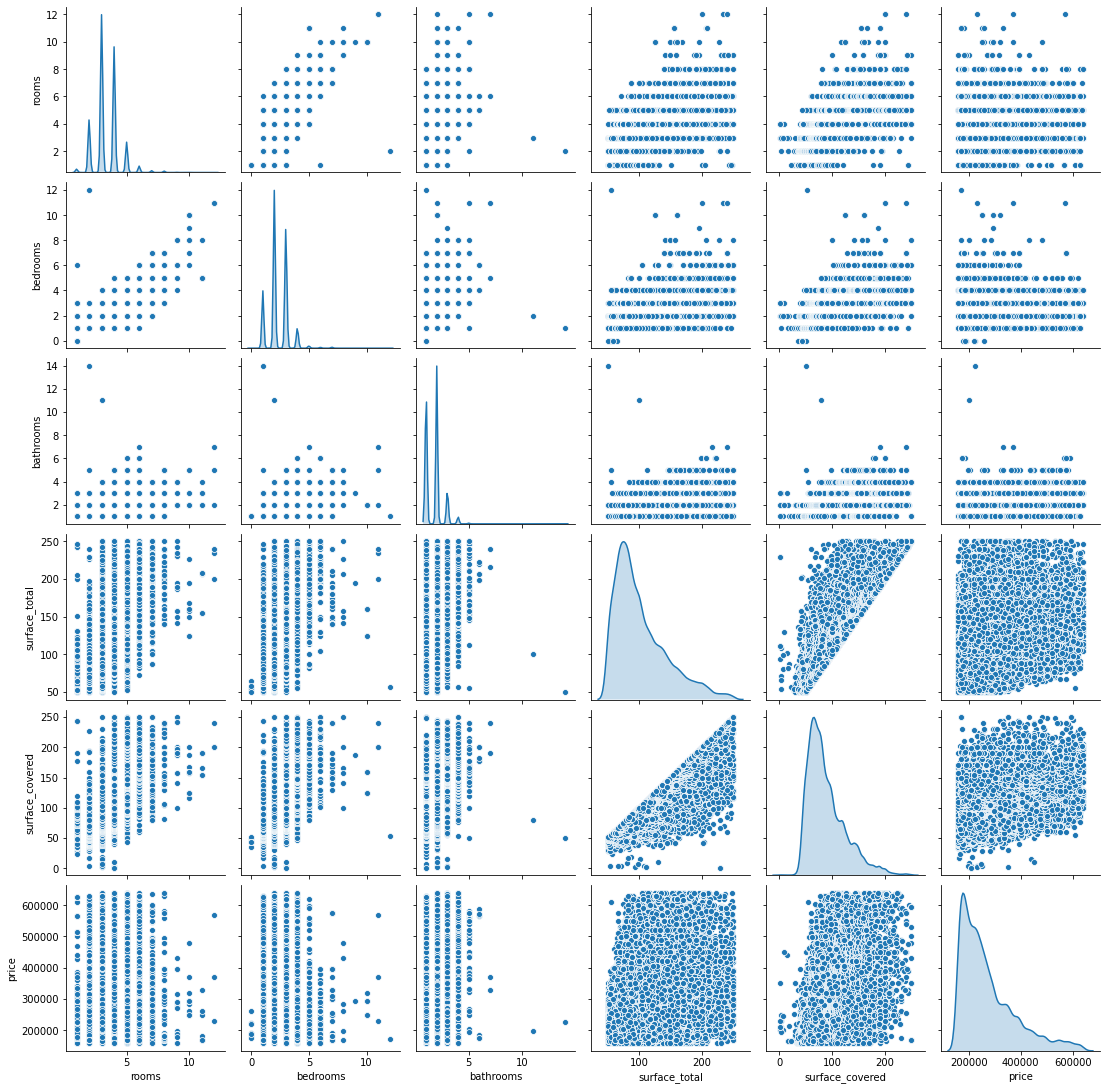

In [32]:
sns.pairplot(est_df, diag_kind = 'kde')



Con este paiplot podemos analizar la dispersión de precios que existen por cada caracterpistica pero, se puede notar que cumple con cada uno de los filtros aplicados, es decir, se nota qué el "surface_covered" no puede ser mayor al "surface_covered". También podemos notar que el rango de precios para "rooms", "bedrooms" y "bathrooms" es bastante disperso en rangos de precio, pero se mantienen en un mismo rango de cantidad, por ejemplo, "bathrooms" se mantiene en un rango entre 1-5 baños.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [33]:
est_corr = est_df.corr()
est_corr

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.928063,0.414391,0.640139,0.714205,0.329262
bedrooms,0.928063,1.000000,0.417192,0.607335,0.686263,0.302265
bathrooms,0.414391,0.417192,1.000000,0.469258,0.521537,0.493758
surface_total,0.640139,0.607335,0.469258,1.000000,0.882246,0.555147
surface_covered,0.714205,0.686263,0.521537,0.882246,1.000000,0.602672
price,0.329262,0.302265,0.493758,0.555147,0.602672,1.000000


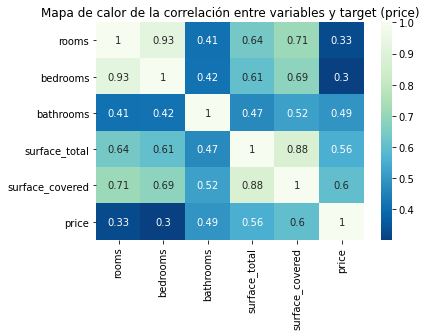

In [34]:
sns.heatmap(est_corr, annot=True, cmap="GnBu_r")
plt.title("Mapa de calor de la correlación entre variables y target (price)")
plt.show()

Con este mapa a calor vemos de una forma gráfica las correlaciones, siendo los más oscuros, las características que menos influyen en el valor entre cada uno. Es decir, "surface_covered" influye más en el precio de una propiedad que "rooms".


In [35]:
corr_pri = est_df.corr()["price"]
corr_pri.sort_values(ascending=False)

price              1.000000
surface_covered    0.602672
surface_total      0.555147
bathrooms          0.493758
rooms              0.329262
bedrooms           0.302265
Name: price, dtype: float64

Las mejores variables para predecir el precio son **surface_total, surface_covered y bathrooms**, ya que son las varibales más altas y próximas a 1, esto quiere decir que influyen más estos tres en el precio que rooms y bedrooms, para cada tipo de propiedad (en este caso PH, Departamento y casa) 

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


### *¿Cuales fueron los meses con la mayor cantidad de propiedades publicadas en venta en la ciudad de Buenos Aires?*

La respuesta puede ser muy generalizada/sesgada debido a que tendría que ser más explicita en las zonas de buenos aires, puede que haya zonas exactas con mayor cantidad de propiedades puestas en venta, o tal vez estas propiedades se publicaron por otro canal de venta no online, u otro canal diferente donde esta bases de datos no pudo recolectar información, tal vez es un solo tipo de propiedad la que incrementa su publicación en venta y se generaliza siendo todas, por ultimo, también depende el ¿cuando?¿2019, 2018, 2020? ¿En que año?. Se podría cambiar la pregunta a "**¿Cuales fueron los meses en el año 2019 con la mayor cantidad de propiedades puestas en venta en la Capital Federal de Buenos Aires?¿Cual fue el tipo de propiedad con mayor cantidad de publicaciones?**". Por otro lado, para obtener la información faltante, haria un web scrapping de diferentes sitios de búsqueda de inmuebles y extraeria su base de datos con los mismos criterios del dataset que tenemos, comparando así sus faltantes para complementar con la mayor cantidad de instancias posible, así como una busqueda de periodicos con publicaciones de venta de propiedades.

In [36]:
# RESPONDIENDO LA PREGUNTA PRINCIPAL
df_copy = data.copy()
df_copy.created_on = pd.to_datetime(df_copy["created_on"])
df_copy["created_on"] = df_copy["created_on"].dt.to_period(freq = "M")
month_df = df_copy.groupby("created_on").size()
print(month_df)

created_on
2019-01     8325
2019-02     8839
2019-03    10283
2019-04     9483
2019-05     9335
2019-06     9832
2019-07    17194
2019-08    11411
2019-09     7098
2019-10    10371
2019-11    21306
2019-12     9172
2020-01    14011
Freq: M, dtype: int64


Text(0, 0.5, 'Cantidad')

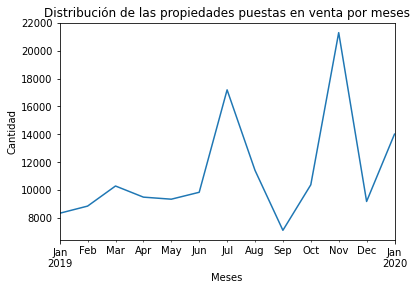

In [37]:
month_df.plot(x="DATE")
plt.title("Distribución de las propiedades puestas en venta por meses")
plt.xlabel("Meses")
plt.ylabel("Cantidad")

El gráfico anterior nos muestra que los meses con mayor cantidad de propiedades publicadas en venta online en el canal de properti de la ciudad de Buenos Aires, fueron los meses de Julio y Noviembre del 2019, así como tambien Enero del 2020, de igual forma hay algo que acotar de la gráfica y es que septiembre cae por debajo de lo que se ve normalmente en tendencia con el resto de los meses, tal vez las personas en septiembre no publican sus propiedades en venta o  tal vez hay menor cantidad de datos para este mes y el resto de datos se publicaron de otra forma o por otros canales. 

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

Primero que todo vamos a filtrar los datos según lo solicitado. 

In [38]:
data_df2 = data[(data.l2 == 'Capital Federal') & (data.property_type.isin(['Departamento', 'Casa','PH']))]
data_df2 = data_df2[(data_df2['surface_total'] <= 1000) & (data_df2['surface_total'] >= 15)]
data_df2 = data_df2[(data_df2['price'] <= 4000000)]
df_final = data_df2[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
df_final = df_final.dropna(axis=0)
print(df_final.shape)
df_final.head()

(81019, 6)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


Vamos a realizar un análisis estadístico de este dataset final para así encontrar si hay una buena distribución y el filtrado quedo bien. 

In [39]:
df_final.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


Una vez más graficamos una distribución por boxplot para ver esta distribución de datos estadísticos de una manera más gráfica

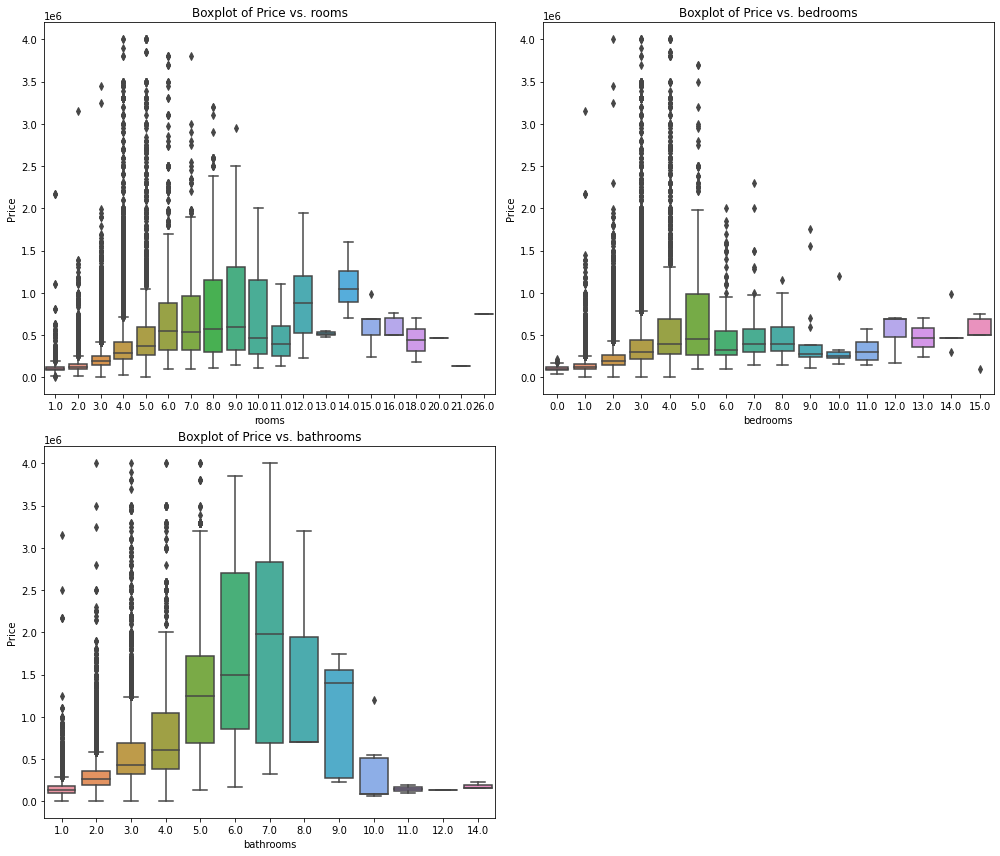

In [40]:
plt.figure(figsize=(14,12))
vars_to_plot = ['rooms', 'bedrooms', 'bathrooms']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='price', data = df_final)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.tight_layout()
    plt.title(title_string)

De este gráfico podemos concluir que hay bastantes outliers, los cuales pueden ser porque existem valores en "surface_covered" mayóres a "surface_total", lo cual no puede ser así, ya que la superficie cubierta no puede ser mayor a la total de una propiedad. De esta manera, se que "surface_covered" no será una variable a escoger para el modelo de machine learning, no nos va a dar una buena predicción en el modelo de regresión. 

Seguidamente, hacer una correlación de las características de las propiedades para así poder encontrar las características o variables que más influyen en nuestro target, en este caso "price".

In [41]:
final_corr = df_final.corr()
final_corr

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


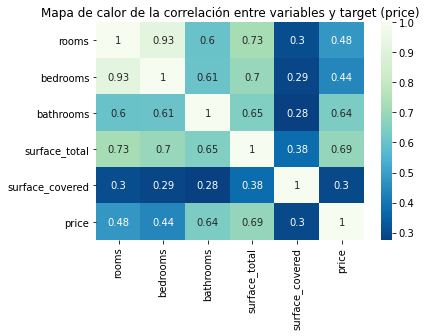

In [42]:
sns.heatmap(final_corr, annot=True, cmap="GnBu_r")
plt.title("Mapa de calor de la correlación entre variables y target (price)")
plt.show()

Analizando el mapa de calor podemos ver que las variables a escoger y que más influyen en el precio son: ***Surface_total, bathrooms y rooms.***

**Importamos las librerias necesarias para realuizar los modelos de Machine Learning.**

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import r2_score

La métrica a escoger va a ser **R-Squared** para cuantificar el rendimiento del modelo. Esta métrica tiene una ventaja, y es que es libre de escala, es decir no importa si los valores de salida son muy grandes o muy pequeños, lo cual nos funciona muy bien para este proyecto. Los valores de R² de 0 a 1 capturan el porcentaje de correlación cuadrática entre los valores de predicción y reales de la variable objetivo. R- Squared mide el rendimiento de un modelo en relación con una media simple de los valores objetivo.

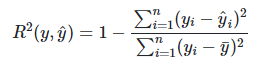

**MODELO MÁS SENCILLO (BENCHMARK)**

Con "surface_total" como variable predictora (X) y un modelo de regresión lineal para predecir el target (y) en este caso "price". 

In [44]:
X = df_final[['surface_total']].values
y = df_final.price
# y = df_final.price.values.reshape(-1,1)
print(X.shape)
print(y.shape)

(81019, 1)
(81019,)


In [45]:
#Train/Test Split para modelo Benchmark
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#Modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

#Se evalua el modelo

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 2))
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 2))

% de no tener error en la predicción en el conjunto de entrenamiento es de: 0.47
% de no tener error en la predicción en el conjunto de testeo es de: 0.48


De esta manera podemos ver probando el modelo con la métrica escogida (**R^2**), que con el modelo más sencillo, tenemos un 48% menos error en el conjunto de testo, en donde R^2 sabemos que un valor cercano a 1 indica un modelo con error cercano a cero, y un valor cercano a cero indica un modelo erroneo en predicción. 

**MODELOS DE MACHINE LEARNING CON LAS PRIMERAS VARIABLES PREDICTORAS**

En el primer caso se escogieron "bathrooms" y "surface_total" como variables predictoras de "price"

In [46]:
X = df_final[['bathrooms', 'surface_total']].values
y = df_final.price

# Se comenta la línea de código inferior debido a que se prueba la necesidad de hacer o no un reshape de la variable "y", en caso de ser necesario se descomenta.

# y = df_final.price.values.reshape(-1,1)

print(X.shape)
print(y.shape)

(81019, 2)
(81019,)


**TRAIN/TEST SPLIT CON PRIMERAS VARIABLES PREVISTAS**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**MODELO DE VECINOS MÁS CERCANOS Y MODELO DE ÁRBOL DE DECISIÓN CON HIPERPARÁMETROS INICIALES EN 5 Y SU EVALUACIÓN CON R^2 (variables iniciales previstas)**

1. Vecinos más cercanos

In [48]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

#Se evalua el modelo
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")

% de no tener error en la predicción en el conjunto de entrenamiento es de: 70.39999999999999 %
% de no tener error en la predicción en el conjunto de testeo es de: 63.5 %


2. Árbol de decisión

In [49]:
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X_train, y_train)
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

#Se evalua el modelo
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")

% de no tener error en la predicción en el conjunto de entrenamiento es de: 60.0 %
% de no tener error en la predicción en el conjunto de testeo es de: 59.8 %


**VARIABLES FINALES**

Se añade "rooms".

Las tres variables predictoras a escoger son: **bathrooms, surface_total y rooms**. Ya que, estas son las de más alta correlación con **"price"**, es decir que estas son las variables que más influyen en el precio de una propiedad. Y así mejorar el modelo con un mejor % de no tener errores (R^2).

In [50]:
X = df_final[['rooms','bathrooms', 'surface_total']].values
y = df_final.price
# y = df_final.price.values.reshape(-1,1)
print(X.shape)
print(y.shape)

(81019, 3)
(81019,)


**TRAIN/TEST SPLIT CON VARIABLES FINALES**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**MODELO DE VECINOS MÁS CERCANOS Y MODELO DE ÁRBOL DE DECISIÓN CON HIPERPARÁMETROS INICIALES EN 5 Y SU EVALUACIÓN CON R^2 (variables finales)**

1. Vecinos más cercanos

In [52]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

#Se evalua el modelo
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")

% de no tener error en la predicción en el conjunto de entrenamiento es de: 76.8 %
% de no tener error en la predicción en el conjunto de testeo es de: 67.9 %


2. Árbol de decisión

In [53]:
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X_train, y_train)
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

#Se evalua el modelo
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")

% de no tener error en la predicción en el conjunto de entrenamiento es de: 62.3 %
% de no tener error en la predicción en el conjunto de testeo es de: 61.7 %


**Gráficos de valores reales vs. valores predichos.**

Modelo: Árbol de Decisión
R^2 en Train: 0.623046559424757
R^2 en Test: 0.617384831416774


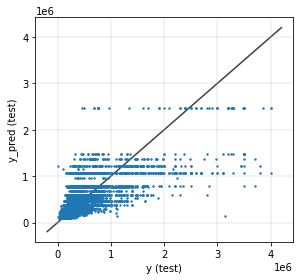

Modelo: Vecinos más cercanos
R^2 en Train: 0.7679395939478271
R^2 en Test: 0.6793770005800909


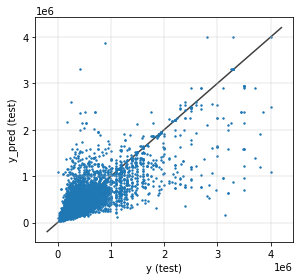

In [54]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'R^2 en Train: {r2_train}')
    print(f'R^2 en Test: {r2_test}')
    
    plt.figure(figsize = (8,4))

    # plt.subplot(1,2,1)
    # sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    # sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    # plt.xlabel('errores')
    # plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.grid(linewidth=0.3)
    plt.tight_layout()
    plt.show()

**CURVA DE VALIDACIÓN VECINO MÁS CERCANO**

Curva para buscar el valor óptimo del hiperparámetro en vecinos más cercano

In [55]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar, en este caso del 1 al 30
k_vecinos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(r2_train)
    lista_accuracy_test.append(r2_test)
    
print(lista_accuracy_test)
print(lista_accuracy_train)

[0.6043345427610656, 0.663049795144897, 0.6722930221593149, 0.6807425421135057, 0.6793770005800909, 0.6783299050400186, 0.6722312098207455, 0.6700649634494364, 0.6658708958506367, 0.6633385481070684, 0.6638815107395597, 0.6602310580540416, 0.6574517145317169, 0.6557820250781268, 0.654345108825265, 0.6503951608156209, 0.6495573372639558, 0.644000879931631, 0.6424192973274401, 0.6387270577370547, 0.6377680613114192, 0.6355390581979413, 0.6315440030082892, 0.6302585507423349, 0.6290638117465606, 0.625811319488743, 0.6252207329088146, 0.6222295123670987, 0.6220964647211686, 0.6200126563073648]
[0.7598675214124418, 0.7890078196995607, 0.784477586033904, 0.7770232556445966, 0.7679395939478271, 0.7579626729931376, 0.7495749074344761, 0.7418351679613037, 0.7336162967962616, 0.7282225268502821, 0.7240569948722266, 0.7167002082678551, 0.709698277934677, 0.7051884466463869, 0.6989066783078444, 0.695878043819059, 0.6933833733071986, 0.6891418616653969, 0.6871479580152076, 0.6840592587151233, 0.681

Text(0, 0.5, 'R^2')

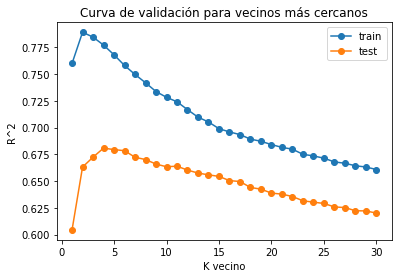

In [56]:
#Graficamos las curvas de validación para el conjunto de testeo y entrenamiento

plt.plot(k_vecinos, lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos, lista_accuracy_test,'o-',label='test')
plt.legend()
plt.title("Curva de validación para vecinos más cercanos")
plt.xlabel("K vecino")
plt.ylabel("R^2")

Probamos el modelo con el hiperparámetro **4** como número de vecinos más cercano y lo evaluamos con la métrica escogida R^2.


In [57]:
knn_regressor = KNeighborsRegressor(n_neighbors=4)
knn_regressor.fit(X_train, y_train)
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

#Evaluamos el modelo y su hiperparámetro escogido
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")

% de no tener error en la predicción en el conjunto de entrenamiento es de: 77.7 %
% de no tener error en la predicción en el conjunto de testeo es de: 68.10000000000001 %


**CURVA DE VALIDACIÓN ÁRBOL DE DECISIÓN**

Curva para buscar el valor óptimo del hiperparámetro en el árbol de decisión

In [58]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar, en este caso de 1 a 30 como el anterior.
k_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

# Generamos un loop sobre los distintos valores de k 
for k in k_depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeRegressor(max_depth=k, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(r2_train)
    lista_accuracy_test.append(r2_test)
    
print(lista_accuracy_test)
print(lista_accuracy_train)

[0.33331680605892344, 0.4742449486081054, 0.5410425021388487, 0.5776827889896374, 0.617384831416774, 0.6391382350054569, 0.652530921251176, 0.6658774012572309, 0.686762150087663, 0.7020865009378454, 0.7109674288393936, 0.7188658131855955, 0.7234792168218402, 0.728431404345105, 0.7276309861933736, 0.7282228314272656, 0.7264222333088057, 0.7266267544177236, 0.7258509808285403, 0.729265659079438, 0.7273178174143313, 0.7285894950903822, 0.7281220417079977, 0.7240054895440201, 0.7237597835069165, 0.725569716010865, 0.725569716010865, 0.725569716010865, 0.725569716010865, 0.725569716010865]
[0.3384422033308194, 0.47537013856679367, 0.534432465795805, 0.5812977986986592, 0.623046559424757, 0.6531782260180176, 0.679219978017628, 0.7059655393443045, 0.7344258048160551, 0.7632118647147765, 0.7880890615567867, 0.8087647704596674, 0.8242849643760695, 0.8372009267168443, 0.8470582048514154, 0.8565141659179214, 0.8631413283187592, 0.8670114805106459, 0.8694812331280904, 0.8707801594037516, 0.8716094

Text(0, 0.5, 'R^2')

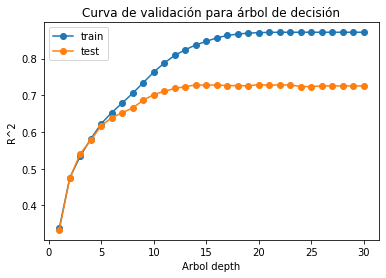

In [59]:
#Graficamos las curvas de validación para el conjunto de testeo y entrenamiento

plt.plot(k_depth, lista_accuracy_train,'o-',label='train' )
plt.plot(k_depth, lista_accuracy_test,'o-',label='test')
plt.legend()
plt.title("Curva de validación para árbol de decisión")
plt.xlabel("Arbol depth")
plt.ylabel("R^2")

Probamos el modelo con el hiperparámetro **22** como la máxima profundidad del Árbol de decisión y lo evaluamos con la métrica escogida R^2.

In [60]:
tree_regressor = DecisionTreeRegressor(max_depth=22, random_state=42)
tree_regressor.fit(X_train, y_train)
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

#Evaluamos el modelo y su hiperparámetro escogido
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")

% de no tener error en la predicción en el conjunto de entrenamiento es de: 87.2 %
% de no tener error en la predicción en el conjunto de testeo es de: 72.89999999999999 %


Y probando el modelo con el hiperparámetro **14** como la máxima profundidad del Árbol de decisión y lo evaluamos con la métrica escogida R^2.

El uso de **14** como hiperparámetro de profundidad, la pruebo, ya que al ver la curva de validación, el 22 se encuentra casi en un punto continuo o estancado casí en un solo rango. 



In [61]:
tree_regressor = DecisionTreeRegressor(max_depth=14, random_state=42)
tree_regressor.fit(X_train, y_train)
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

#Evaluamos el modelo y su hiperparámetro escogido
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")

% de no tener error en la predicción en el conjunto de entrenamiento es de: 83.7 %
% de no tener error en la predicción en el conjunto de testeo es de: 72.8 %


**GRÁFICA DE VALORES REALES Vs. VALORES PREDICHOS**

Modelo: Árbol de Decisión
R^2 en Train: 0.8372009267168443
R^2 en Test: 0.728431404345105


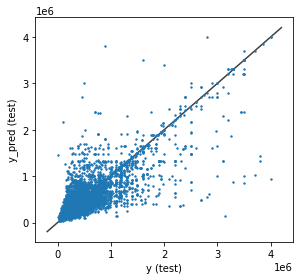

Modelo: Vecinos más cercanos
R^2 en Train: 0.7770232556445966
R^2 en Test: 0.6807425421135057


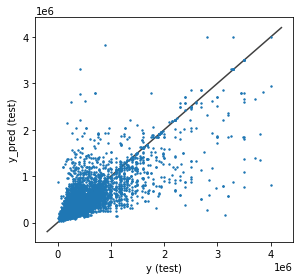

In [62]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'R^2 en Train: {r2_train}')
    print(f'R^2 en Test: {r2_test}')
    
    plt.figure(figsize = (8,4))

    # plt.subplot(1,2,1)
    # sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    # sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    # plt.xlabel('errores')
    # plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**GRIDSEARCH**

Función de Scikit-Learn para buscar el valor óptimo de los hiperparámetros

1. Vecino más cercano

In [63]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

# Define los hyperparámetros, en este caso el número de vecinos hasta 30 como lo
# fue con la curva de validación y el peso en distancia de los vecinos
hp_candidates = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
                                20,21,22,23,24,25,26,27,28,29,30], 
                  'weights':['uniform','distance']}]

# Se busca mediante GridSearch el mejor hyperparámetro según los ya propuestos
grid = GridSearchCV(estimator=knn_regressor, param_grid=hp_candidates, 
                    scoring='r2')

grid.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [64]:
# Se obtiene y se visualizan los mejor hiperparámetros encontrados con GridSearch
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7082661125992513
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                    weights='distance')
{'n_neighbors': 30, 'weights': 'distance'}


Se entrena y se evalua el modelo de vecinos más cercanos con el hiperparámetro encontrado con GridSearch

In [65]:
knn_regressor = KNeighborsRegressor(n_neighbors=30, weights= 'distance')
knn_regressor.fit(X_train, y_train)
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

#Evaluamos el modelo y su hiperparámetro escogido
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")

% de no tener error en la predicción en el conjunto de entrenamiento es de: 87.1 %
% de no tener error en la predicción en el conjunto de testeo es de: 74.0 %


2. Árbol de Decisión

In [66]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

# Define los hyperparámetros, en este caso van a hacer la profundidad del Árbol
# Y el random state
hp_candidates = [{'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
                                20,21,22,23,24,25,26,27,28,29,30], 
                  'random_state':[5,10,20,42]}]

# Se busca mediante GridSearch el mejor hyperparámetro según los ya propuestos
grid = GridSearchCV(estimator=tree_regressor, param_grid=hp_candidates, 
                    scoring='r2')

grid.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 2

In [67]:
# Se obtiene y se visualizan los mejor hiperparámetros encontrados con GridSearch
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.6797473969397523
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=17,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=20, splitter='best')
{'max_depth': 17, 'random_state': 20}


Se entrena y se evalua el modelo de Árbol de decisión con el hiperparámetro encontrado con GridSearch

In [68]:
tree_regressor = DecisionTreeRegressor(max_depth=17, random_state=20)
tree_regressor.fit(X_train, y_train)
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

#Evaluamos el modelo y su hiperparámetro escogido
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")

% de no tener error en la predicción en el conjunto de entrenamiento es de: 86.3 %
% de no tener error en la predicción en el conjunto de testeo es de: 72.5 %


**GRÁFICA DE VALORES REALES Vs. VALORES PREDICHOS**

Modelo: Árbol de Decisión
R^2 en Train: 0.8631413283187592
R^2 en Test: 0.7251969548362089


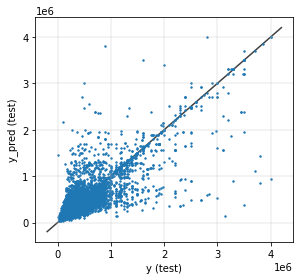

Modelo: Vecinos más cercanos
R^2 en Train: 0.8711641959789334
R^2 en Test: 0.7397694373073838


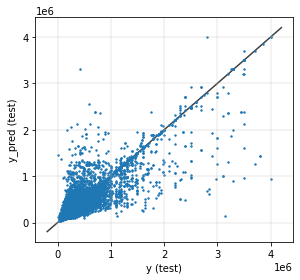

In [69]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'R^2 en Train: {r2_train}')
    print(f'R^2 en Test: {r2_test}')
    
    plt.figure(figsize = (8,4))

    # plt.subplot(1,2,1)
    # sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    # sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    # plt.xlabel('errores')
    # plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.grid(linewidth=0.3)
    plt.tight_layout()
    plt.show()

Finalmente, entre los modelos entrenados, sin tener en cuenta la funcionalidad de GridSearch, solo tomando en cuenta la curva de validación, escogería el modelo de Árbol de decisión, me da un mejor porcentaje de acierto, en este caso con la evaluación del modelo usando la métrica escogida (R^2), una menor probabilidad de error al momento de predecir el precio de una propiedad. De igual forma, al momento de usar la funcionalidad de GridSearch y utilizar otros dos hipérparámetros (uno más por cada modelo), cambia la evaluación al modelo, ya que al entregarle mejores opciones de evaluación al modelo se ajusta a perfeccionar su posibilidad de predicción. 